In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
apd_res = "/home/thanhtvt1/workspace/Directed_Evolution/exps/results/result_apd-pop10-pros4-steps25-seed210.csv"
dramp_res = "/home/thanhtvt1/workspace/Directed_Evolution/exps/results/result_dramp-pop10-pros4-steps25-seed210.csv"

In [46]:
def process(path):
    df = pd.read_csv(path)
    df["mutants"].fillna("", inplace=True)
    df["length"] = df["WT"].apply(lambda x: len(x))
    df["num_mutation"] = df["mutants"].apply(lambda x: len(x.split(":")))
    return df

In [47]:
apd_df = process(apd_res)
apd_df

,WT,mutants,score,length,num_mutation
0,GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV,S4E:I6A:W3K:G1A:G22A:G10A:A16E:L2A:G27E:A20E:S...,1.429800,33,16
1,YVPLPNVPQPGRRPFPTFPGQGPFNPKIKWPQGY,L4P:T17P:W30P:I28P:Q9P:K27P:K29P:N6P:N25P:V2P:...,1.982347,34,19
2,DGVKLCDVPSGTWSGHCGSSSKCSQQCKDREHFAYGGACHYQFPSV...,H16P:H40G:T12S:E31G:L5S:D29S:H32G:G11G:D7S:W13...,0.693065,54,21
3,NLCERASLTWTGNCGNTGHCDTQCRNWESAKHGACHKRGNWKCFCYFDC,T22C:N1M:Y46G:F44G:L2A:W10C:W27T:Q23A:W41G:F47...,0.920334,49,18
4,VFIDILDKVENAIHNAAQVGIGFAKPFEKLINPK,H14K:Q18K:I3K:N32K:P26E:P33K:V9A:V1M:G22E:F23A...,1.319280,34,21
...,...,...,...,...,...
3162,VGAVAFGPVGAVVGGLASGFTGKQT,L16V:A3G:F6G:A5V:K23G:P8V:A11G:S18G:Q24V:F20V:...,1.746599,25,14
3163,GPKTKAACKMACKLATCGKKPGGWKCKLCELGCDAV,K3C:L14K:D34K:E30K:W24K:G22C:M10K:L31K:V36C:L2...,1.409066,36,20
3164,GIKEMLCNMACAQTVCKKSGGPLCDTCQAACKALG,G1M:N8C:E4K:D25P:A12G:I2A:G21K:C31L:C7K:C16K:A...,1.064614,35,19
3165,GFSSLFKAGAKYLLKQVGKAGAQQLACKAANNC,V17A:Y12A:C27K:Q24A:C33L:F2A:F6A:Q16A:Q23K:N31...,1.540114,33,19


In [49]:
apd_df.describe()

,score,length,num_mutation
count,3167.000000,3167.000000,3167.000000
mean,1.509267,33.263656,17.513420
std,0.537483,22.176208,5.403702
min,-0.118343,2.000000,1.000000
25%,1.153819,20.000000,14.000000
50%,1.548545,29.000000,19.000000
75%,1.921476,39.000000,22.000000
max,2.669323,183.000000,25.000000


In [54]:
apd_df[apd_df.score <= 0.0]

,WT,mutants,score,length,num_mutation
527,DDDDDDD,,0.000000,7,1
723,GVCRCLCRRGVCRCLCRR,,0.000000,18,1
724,GFCRCICTRGFCRCICTR,,0.000000,18,1
803,RCVCTRGFCRCVCTRGFC,,0.000000,18,1
1206,GICRCICGRGICRCICGR,,0.000000,18,1
1208,RICRCICGRRICRCICGR,,0.000000,18,1
1671,RCVCTRGFCRCVCTRGFC,,0.000000,18,1
2029,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,,0.000000,74,1
2806,MSGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKR...,G29R:V82V:R93R:G10G:R24R:G5G:R41R,-0.118343,103,7
2808,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,K57R:A26A:R18R:K24K,-0.045260,136,4


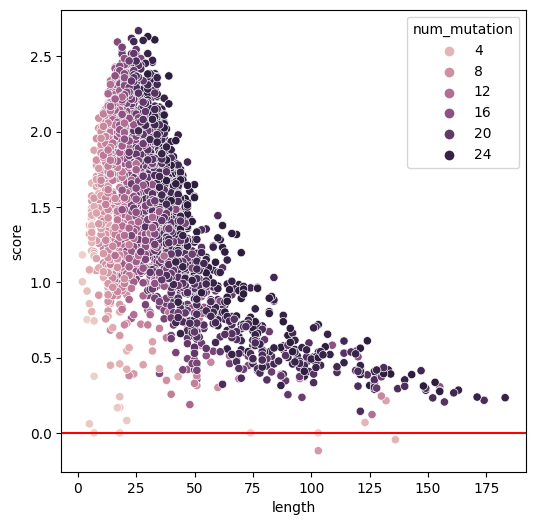

In [50]:
def plot(df):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(df, x="length", y="score", hue="num_mutation")
    ax.axhline(y=0, color="r")

plot(apd_df)

# DRAMP

In [51]:
dramp_df = process(dramp_res)
dramp_df

,WT,mutants,score,length,num_mutation
0,SLGPAIKATRQVCPKATRFVTVSCKKSDCQ,I6P:D28T:F19Q:K25P:G3K:L2P:C29R:C13T:C24A:A5T:...,1.341331,30,15
1,VTSWSLCTPGCTSPGGGSNCSFCC,P14G:N19C:F22G:V1M:T12C:W4S:L6C:T8G:P9G:S18G:T...,1.553940,24,15
2,GNGVLKTISHECNMNTWQFLFTCC,G1M:S9L:W17L:Q18L:E11L:N15L:C23L:H10L:M14L:N13...,2.376491,24,21
3,SSSGWLCTLTIECGTIICACR,C20S:W5S:C7S:L6S:L9S:T8S:G4S:E12S:A19S:I11S:I1...,2.333398,21,18
4,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Y9K:Y24L:F6K:W22K:P36K:W40K:T37K:A49F:Y13A:G26...,1.035935,51,25
...,...,...,...,...,...
5893,SLDYINVTFLDLQDEMNRLQEAIKVLNQSYINLKDI,A22E:I31E:S1M:V7K:M16N:R18K:Y30I:F9I:Q20K:S29E...,1.218090,36,22
5894,SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKELK,A22E:L36K:N6E:S1M:T8K:I31K:F9I:S29E:Q4E:V7K:D3...,1.342923,37,19
5895,SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKEL,T8K:D32K:Q4E:V7K:A22E:F9I:M16K:N6E:Y14E:Y30I:S...,1.338668,36,19
5896,ISGINASVVNIQKEIDRLNEVAKNLNESLIDLQEL,A22I:I1M:G3E:V8I:R17E:S7E:A6E:V21E:N5E:I30K:S2...,1.149941,35,22


In [52]:
dramp_df.describe()

,score,length,num_mutation
count,5898.000000,5898.000000,5898.000000
mean,1.461640,32.165141,16.636317
std,0.558220,20.297713,6.018947
min,0.000000,2.000000,1.000000
25%,1.039266,17.000000,12.000000
50%,1.500693,26.000000,18.000000
75%,1.924732,43.000000,22.000000
max,2.605006,101.000000,25.000000


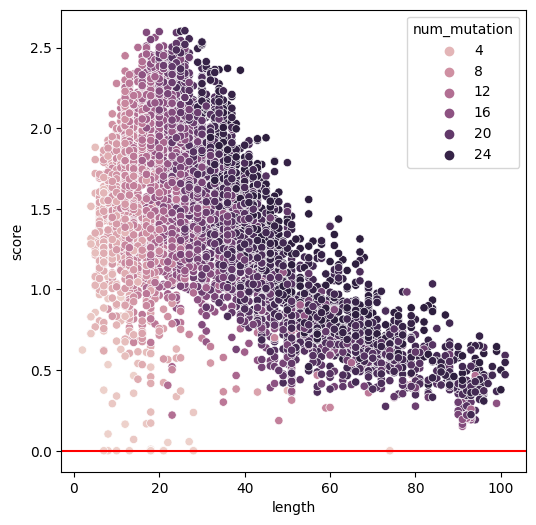

In [53]:
plot(dramp_df)

In [55]:
dramp_df[dramp_df.score <= 0]

,WT,mutants,score,length,num_mutation
839,RCVCTRGFCRCVCTRGFC,,0.0,18,1
876,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,,0.0,74,1
3179,RCICTRGFCRCICTRGFC,,0.0,18,1
4089,KWKWKWKW,,0.0,8,1
4090,KWKWKWKWKW,,0.0,10,1
4201,KIGAKIKIGAKIKIGAKI,,0.0,18,1
4202,KIAGKIAKIAGKIAKIAGKIA,,0.0,21,1
4203,KLAGLAKKLAGLAKKLAGLAK,,0.0,21,1
4398,RCICGRGICRCICGRGIC,,0.0,18,1
4745,MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFA...,,0.0,74,1
